In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import load_model
from keras.applications import ResNet101

2024-04-09 11:13:18.090053: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 11:13:18.090157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 11:13:18.217543: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
conv_base=ResNet101(
weights='imagenet',
include_top=False,
input_shape=(150,150,3)
)

In [11]:
train=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/leafdiseasedetection/Final dataset/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)
valid=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/leafdiseasedetection/Final dataset/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 18740 files belonging to 2 classes.
Found 1410 files belonging to 2 classes.


In [12]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet101 (Functional)          │ ?                      │    42,658,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 42,552,832 (162.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [14]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [15]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['accuracy'])

In [16]:
history=model.fit(train,epochs=15,validation_data=valid,callbacks=[callback])

Epoch 1/15


I0000 00:00:1712661574.261705      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712661574.423409      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9100 - loss: 13.7305

W0000 00:00:1712661797.835743      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 329s 397ms/step - accuracy: 0.9100 - loss: 13.7270 - val_accuracy: 0.9844 - val_loss: 7.8165
Epoch 2/15


W0000 00:00:1712661806.748586      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 172s 293ms/step - accuracy: 0.9951 - loss: 6.0832 - val_accuracy: 0.9936 - val_loss: 2.3753
Epoch 3/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 171s 291ms/step - accuracy: 0.9981 - loss: 1.7514 - val_accuracy: 0.9943 - val_loss: 0.6271
Epoch 4/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 171s 292ms/step - accuracy: 0.9990 - loss: 0.4514 - val_accuracy: 0.9901 - val_loss: 0.1821
Epoch 5/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 171s 292ms/step - accuracy: 0.9993 - loss: 0.1127 - val_accuracy: 0.9929 - val_loss: 0.0627
Epoch 6/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 171s 292ms/step - accuracy: 0.9994 - loss: 0.0328 - val_accuracy: 0.9957 - val_loss: 0.0272
Epoch 7/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 171s 292ms/step - accuracy: 0.9990 - loss: 0.0123 - val_accuracy: 0.9936 - val_loss: 0.0575
Epoch 8/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 202s 292ms/step - accuracy: 0.9995 - loss: 0.0056 - val_accuracy: 0.9950 - val_loss: 0.0154
Epoch 9/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 171s 292ms/step - accuracy: 0.9997 - loss: 0.00

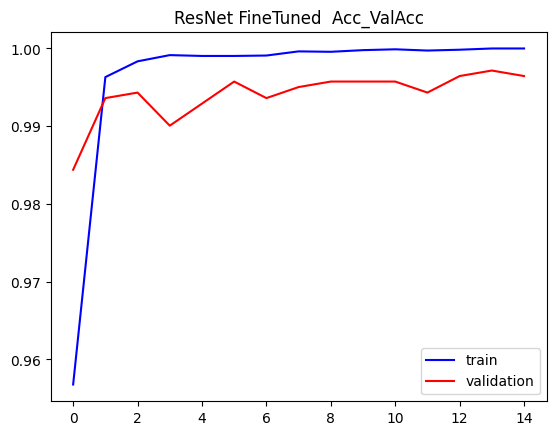

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.title("ResNet FineTuned  Acc_ValAcc")
plt.savefig('accuracy_history.png')
plt.show()

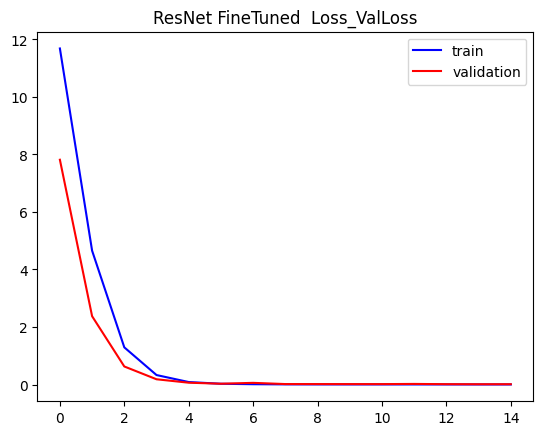

In [18]:
plt.plot(history.history["loss"],color='blue',label='train')
plt.plot(history.history["val_loss"],color='red',label='validation')
plt.legend()
plt.title("ResNet FineTuned  Loss_ValLoss")
plt.savefig('loss_history.png')
plt.show()

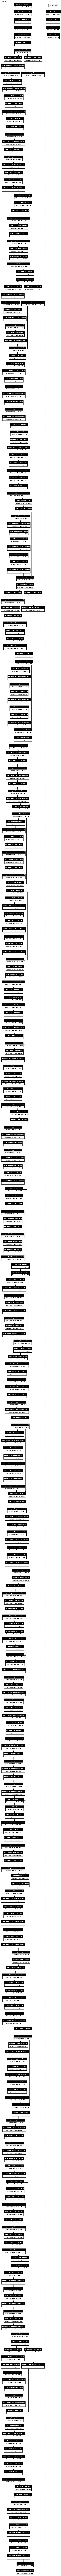

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, dpi=100, to_file='model.png')

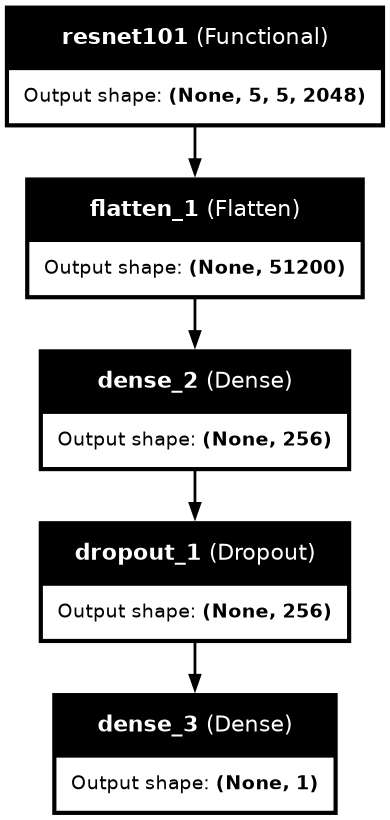

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=False, dpi=100, to_file='model1.png')

In [21]:
import cv2

In [22]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG")

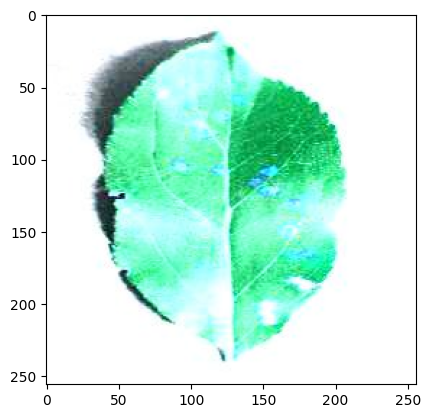

In [23]:
plt.imshow(test_img)

In [24]:
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)

In [25]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


array([[0.00641161]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.9999933]], dtype=float32)

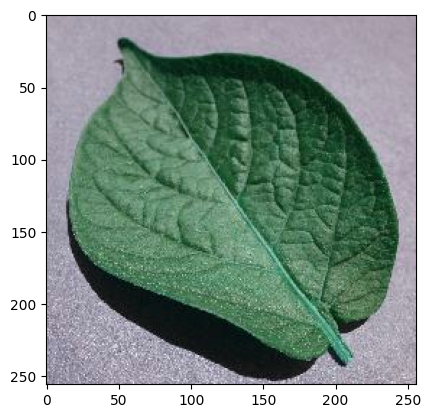

In [26]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/PotatoHealthy1.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[2.9419383e-05]], dtype=float32)

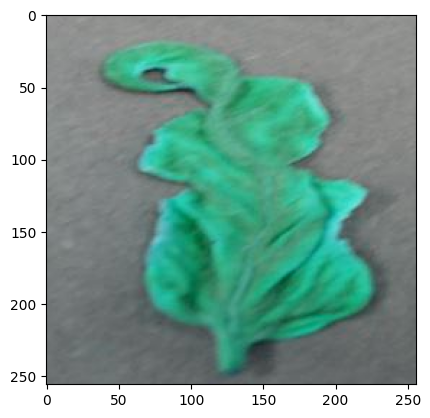

In [27]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus5.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.00037331]], dtype=float32)

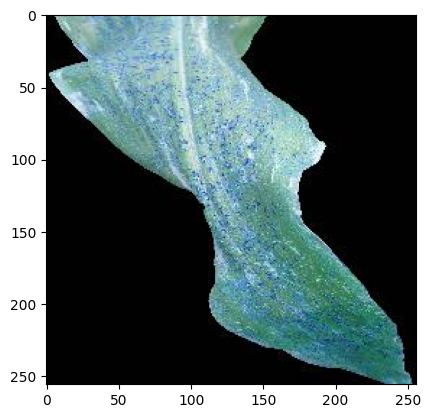

In [28]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust3.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.00025548]], dtype=float32)

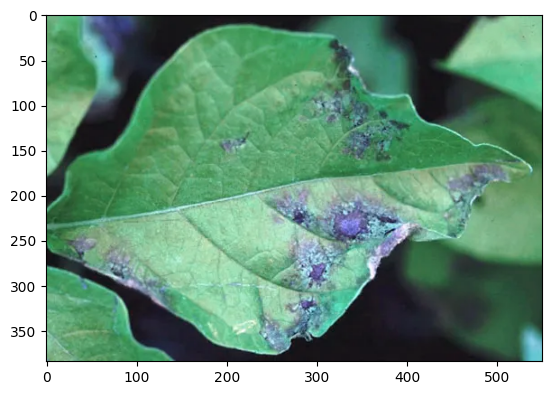

In [29]:
test_img=cv2.imread("/kaggle/input/himanshu1/Defected5.webp")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet101 (Functional)          │ (None, 5, 5, 2048)     │    42,658,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,426,436 (425.06 MB)

 Trainable params: 55,660,545 (212.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

 Optimizer params: 55,660,547 (212.33 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[7.567789e-05]], dtype=float32)

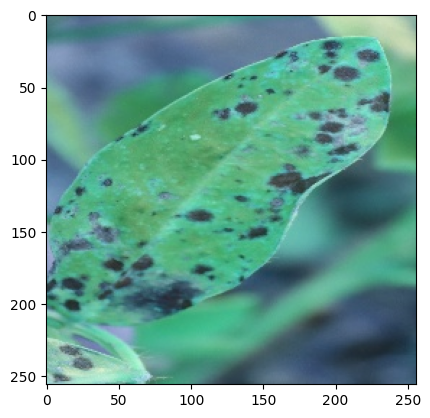

In [31]:
test_img=cv2.imread("/kaggle/input/groundnuttest/New folder/Defected/25.jpg")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

In [32]:
import cv2
from matplotlib import pyplot as plt
def imgch(img):
    lab_img=cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
    l,a,b=cv2.split(lab_img)
    equ=cv2.equalizeHist(l)
    updated_lab_img =cv2.merge((equ,a,b))
    return cv2.cvtColor(updated_lab_img,cv2.COLOR_LAB2BGR)

In [33]:
import os
path="/kaggle/input/groundnuttest/New folder/"
im_size=150
images=[]
labels=[]
leaf_types=os.listdir('/kaggle/input/groundnuttest/New folder/')
leaf_types

['Healthy', 'Defected']

In [34]:
for i in leaf_types:
  data_path=path+str(i)
  filenames=[i for i in os.listdir(data_path)]
  print(len(filenames))
  #print(filenames)
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    img=imgch(img)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)

409
3116


In [35]:
import numpy as np
images=np.array(images)
#images=images.astype("float32")/255
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=labels
l=LabelEncoder()
l.fit(["Defected","Healthy"])
list(l.classes_)
y=l.transform(y)

In [36]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [37]:
y_pr=model.predict(images)

111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step


In [38]:
y_p=(y_pr>0.25)

In [39]:
import pandas as pd

In [40]:
y_p=pd.DataFrame(y_p)

In [41]:
y_predict=np.where(y_p[0]==True,1,0)

test accuracy: 90.8652 %




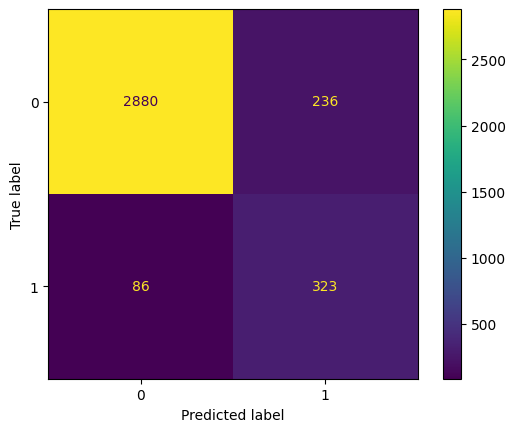

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      3116
           1       0.58      0.79      0.67       409

    accuracy                           0.91      3525
   macro avg       0.77      0.86      0.81      3525
weighted avg       0.93      0.91      0.91      3525



In [42]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
test_accu = np.sum(y == y_predict) / len(y) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")
cm=confusion_matrix(y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y, y_predict))

58
549
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 465ms/step
test accuracy: 86.6557 %




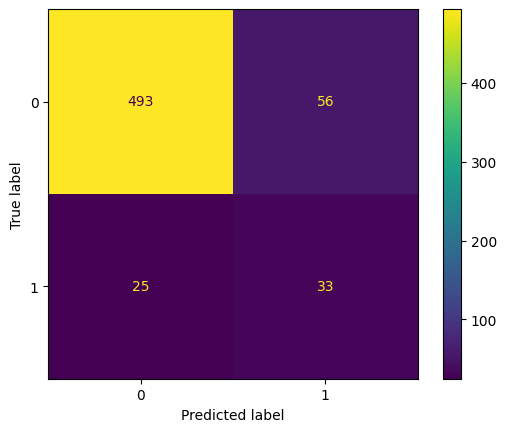

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       549
           1       0.37      0.57      0.45        58

    accuracy                           0.87       607
   macro avg       0.66      0.73      0.69       607
weighted avg       0.90      0.87      0.88       607



In [43]:
import os
path="/kaggle/input/cirtustesting/New folder/"
im_size=150
images=[]
labels=[]
leaf_types=os.listdir('/kaggle/input/cirtustesting/New folder/')
leaf_types
for i in leaf_types:
  data_path=path+str(i)
  filenames=[i for i in os.listdir(data_path)]
  print(len(filenames))
  #print(filenames)
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    img=imgch(img)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)
import numpy as np
images=np.array(images)
#images=images.astype("float32")/255
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=labels
l=LabelEncoder()
l.fit(["Defected","Healthy"])
list(l.classes_)
y=l.transform(y)
y_pr=model.predict(images)
y_p=(y_pr>0.25)
y_p=pd.DataFrame(y_p)
y_predict=np.where(y_p[0]==True,1,0)
test_accu = np.sum(y == y_predict) / len(y) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")
cm=confusion_matrix(y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y, y_predict))

In [44]:
model.evaluate(valid)

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9982 - loss: 0.0046


[0.010393811389803886, 0.9964538812637329]